In [1]:
# set borders to cool ├── ones instead of 1960 +--- ones
!echo "\pset linestyle unicode" >> ~/.psqlrc # 
!echo "\pset border 2" >> ~/.psqlrc

In [3]:
! cat ~/.psqlrc

\pset linestyle unicode
\pset border 2


In [4]:
!echo "SET postgis.gdal_enabled_drivers = 'ENABLE_ALL';" >> ~/.psqlrc

In [5]:
# working only in linux
#!service postgresql start

/bin/sh: service: command not found


In [6]:
!psql -c "create extension postgis;"

psql: error: could not connect to server: FATAL:  database "dzianissheka" does not exist


In [10]:
!psql -q -c "select postgis_full_version();"

psql: error: could not connect to server: FATAL:  database "dzianissheka" does not exist


In [20]:
!brew services restart postgresql

Stopping `postgresql`... (might take a while)
==> Successfully stopped `postgresql` (label: homebrew.mxcl.postgresql)
==> Successfully started `postgresql` (label: homebrew.mxcl.postgresql)


In [13]:
# not working because of brew usage
# !pg_ctl -D /usr/local/var/postgres start

pg_ctl: another server might be running; trying to start server anyway
waiting for server to start....2020-03-21 20:55:36.749 +03 [91558] FATAL:  lock file "postmaster.pid" already exists
2020-03-21 20:55:36.749 +03 [91558] HINT:  Is another postmaster (PID 91541) running in data directory "/usr/local/var/postgres"?
 stopped waiting
pg_ctl: could not start server
Examine the log output.


In [ ]:
ls -al /usr/local/var/postgres

In [17]:
!initdb /usr/local/var/postgres

The files belonging to this database system will be owned by user "dzianissheka".
This user must also own the server process.

The database cluster will be initialized with locales
  COLLATE:  C
  CTYPE:    UTF-8
  MESSAGES: C
  MONETARY: C
  NUMERIC:  C
  TIME:     C
The default database encoding has accordingly been set to "UTF8".
initdb: could not find suitable text search configuration for locale "UTF-8"
The default text search configuration will be set to "simple".

Data page checksums are disabled.

creating directory /usr/local/var/postgres ... ok
creating subdirectories ... ok
selecting dynamic shared memory implementation ... posix
selecting default max_connections ... 100
selecting default shared_buffers ... 128MB
selecting default time zone ... Europe/Minsk
creating configuration files ... ok
running bootstrap script ... ok
performing post-bootstrap initialization ... ok
syncing data to disk ... ok

initdb: warning: enabling "trust" authentication for local connections
You c

In [16]:
#!rm -r /usr/local/var/postgres

In [19]:
!pg_ctl -D /usr/local/var/postgres -l logfile start

pg_ctl: another server might be running; trying to start server anyway
waiting for server to start.... stopped waiting
pg_ctl: could not start server
Examine the log output.


In [21]:
# !createdb postgis_test

In [ ]:
!psql postgis_test

In [3]:
!psql postgis_test -c "create extension postgis;"

Line style is unicode.
Border style is 2.
SET
CREATE EXTENSION


In [4]:
!psql postgis_test -c "create extension postgis_raster;"

Line style is unicode.
Border style is 2.
SET
CREATE EXTENSION


In [6]:
from IPython.display import Image

In [2]:
!psql postgis_test -q -c "select postgis_full_version();"

┌───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                                                                               postgis_full_version                                                                                                │
├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ POSTGIS="3.0.1 ec2a9aa" [EXTENSION] PGSQL="120" GEOS="3.8.1-CAPI-1.13.3" PROJ="7.0.0" GDAL="GDAL 2.4.4, released 2020/01/08" LIBXML="2.9.10" LIBJSON="0.13.1" LIBPROTOBUF="1.3.3" WAGYU="0.4.3 (Internal)" RASTER │
└───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [4]:
!psql postgis_test -q -c "select ST_AsText(ST_Buffer('POINT(0 0)', 10))"

┌───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

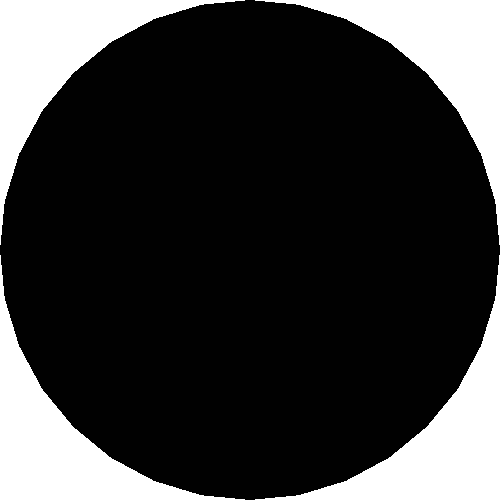

In [7]:
!psql postgis_test -q -c " copy (SELECT encode(ST_AsPNG(ST_AsRaster(ST_Buffer(ST_Point(1,5),10),500, 500)),'hex')) to stdout;" | xxd -r -p > image.png
Image('image.png')

In [9]:
!brew install osm2pgsql

==> Installing dependencies for osm2pgsql: lua and luajit
==> Installing osm2pgsql dependency: lua
==> Downloading https://homebrew.bintray.com/bottles/lua-5.3.5_1.mojave.bottle.t
######################################################################## 100.0%
==> Pouring lua-5.3.5_1.mojave.bottle.tar.gz
==> Caveats
You may also want luarocks:
  brew install luarocks
==> Summary
🍺  /usr/local/Cellar/lua/5.3.5_1: 28 files, 274.5KB
==> Installing osm2pgsql dependency: luajit
==> Downloading https://homebrew.bintray.com/bottles/luajit-2.0.5.mojave.bottle.
==> Downloading from https://akamai.bintray.com/a1/a127723ca4997acaa45e3b548eeb4
######################################################################## 100.0%
==> Pouring luajit-2.0.5.mojave.bottle.3.tar.gz
🍺  /usr/local/Cellar/luajit/2.0.5: 31 files, 1.9MB
==> Installing osm2pgsql
==> Downloading https://homebrew.bintray.com/bottles/osm2pgsql-1.2.1_1.mojave.bo
==> Downloading from https://akamai.bintray.com/b8/b8c30a15e7d08731e701e46b1

In [10]:
!createdb gis

In [11]:
!psql -d gis -c "CREATE EXTENSION postgis;"

Line style is unicode.
Border style is 2.
SET
CREATE EXTENSION


In [13]:
!psql -d gis -q -c "select postgis_full_version();" 

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                                                        postgis_full_version                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ POSTGIS="3.0.1 ec2a9aa" [EXTENSION] PGSQL="120" GEOS="3.8.1-CAPI-1.13.3" PROJ="7.0.0" LIBXML="2.9.10" LIBJSON="0.13.1" LIBPROTOBUF="1.3.3" WAGYU="0.4.3 (Internal)" │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘
(1 row)



In [14]:
#!mkdir ../osm/belarus

/Users/dzianissheka/projects/dev/GIS/notebooks


In [27]:
!wget https://download.geofabrik.de/europe/belarus-latest.osm.pbf

--2020-03-21 23:29:44--  https://download.geofabrik.de/europe/belarus-latest.osm.pbf
Resolving download.geofabrik.de (download.geofabrik.de)... 88.99.142.44, 116.202.112.212
Connecting to download.geofabrik.de (download.geofabrik.de)|88.99.142.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213449679 (204M) [application/octet-stream]
Saving to: ‘belarus-latest.osm.pbf.1’

belarus-latest.osm. 100%[===================>] 203.56M   335KB/s    in 5m 20s  

2020-03-21 23:35:05 (652 KB/s) - ‘belarus-latest.osm.pbf.1’ saved [213449679/213449679]



In [41]:
!wget https://osm-internal.download.geofabrik.de/europe/belarus-latest-internal.osm.pbf

--2020-03-22 01:13:01--  https://osm-internal.download.geofabrik.de/europe/belarus-latest-internal.osm.pbf
Resolving osm-internal.download.geofabrik.de (osm-internal.download.geofabrik.de)... 95.216.39.125
Connecting to osm-internal.download.geofabrik.de (osm-internal.download.geofabrik.de)|95.216.39.125|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2020-03-22 01:13:13 ERROR 403: Forbidden.



In [23]:
!ls -al

total 424984
drwxr-xr-x  8 dzianissheka  staff        256 Mar 21 21:55 .
drwxr-xr-x  5 dzianissheka  staff        160 Mar 21 21:12 ..
drwxr-xr-x  4 dzianissheka  staff        128 Mar 21 21:01 .ipynb_checkpoints
-rw-r--r--  1 dzianissheka  staff  213449679 Mar 21 04:45 belarus-latest.osm.pbf
-rw-r--r--  1 dzianissheka  staff       2870 Mar 21 21:05 image.png
-rw-r--r--  1 dzianissheka  staff       9886 Mar 21 20:59 install_postgis.ipynb
-rw-r--r--  1 dzianissheka  staff      33365 Mar 21 21:55 install_postgis_continue.ipynb
-rw-------  1 dzianissheka  staff        216 Mar 21 20:57 logfile


In [25]:
!osm2pgsql --slim --username dzianissheka --database gis belarus-latest.osm.pbf

osm2pgsql version 1.2.1 (64 bit id space)

Allocating memory for dense node cache
Allocating dense node cache in one big chunk
Allocating memory for sparse node cache
Sharing dense sparse
Node-cache: cache=800MB, maxblocks=12800*65536, allocation method=11
Mid: pgsql, cache=800
Setting up table: planet_osm_nodes
Setting up table: planet_osm_ways
Setting up table: planet_osm_rels
Using built-in tag processing pipeline
Using projection SRS 3857 (Spherical Mercator)
Setting up table: planet_osm_point
Setting up table: planet_osm_line
Setting up table: planet_osm_polygon
Setting up table: planet_osm_roads

Reading in file: belarus-latest.osm.pbf
Using PBF parser.
Processing: Node(24560k 558.2k/s) Way(3614k 100.41k/s) Relation(55350 3690.00/s)  parse time: 95s
Node stats: total(24560731), max(7313932531) in 44s
Way stats: total(3614644), max(783179764) in 36s
Relation stats: total(57965), max(10867787) in 15s
Sorting data and creating indexes for planet_osm_line
Sorting data and creating in

In [10]:
!psql -q -d gis -c "select * FROM planet_osm_point where admin_level IS NOT NULL limit 5;"

┌────────────┬────────────┬────────────────┬──────────────────┬────────────────────┬─────────────┬───────────┬─────────┬─────────┬──────┬────────────────┬─────────┬───────┬────────┬────────────────┬──────────┬─────────┬──────────────┬─────────┬─────────┬─────────┬──────────────┬─────────┬─────┬────────────┬──────┬──────────────────┬─────────┬─────────┬──────────┬───────┬──────────────┬──────────┬─────────┬───────┬─────────┬──────┬──────────┬──────────┬──────────┬────────────────────────────────────────────┬─────────┬────────┬────────┬──────────┬────────┬────────────┬───────┬──────────────┬──────────────────┬─────────┬─────┬──────────┬───────┬─────────┬──────┬───────┬─────────┬──────┬─────────┬────────────┬────────┬───────┬──────────┬─────────┬───────┬──────┬─────────┬────────────────────────────────────────────────────┐
│   osm_id   │   access   │ addr:housename │ addr:housenumber │ addr:interpolation │ admin_level │ aerialway │ aeroway │ amenity │ area │    barrier     │ bicycle │ bra

In [28]:
!touch export-config.json

In [33]:
!brew install osmium-tool

SyntaxError: invalid syntax (<ipython-input-33-20e95f68eba0>, line 20)

In [40]:
!osmium export -c export-config.json -f pg belarus-latest.osm.pbf -o export.sql -v --overwrite

[ 0:00] Started osmium export
[ 0:00]   osmium version 1.11.1
[ 0:00]   libosmium version 2.15.3
[ 0:00] Command line options and default settings:
[ 0:00]   input options:
[ 0:00]     file name: belarus-latest.osm.pbf
[ 0:00]     file format: 
[ 0:00]   output options:
[ 0:00]     file name: export.sql
[ 0:00]     file format: pg
[ 0:00]     overwrite: yes
[ 0:00]     fsync: no
[ 0:00]   attributes:
[ 0:00]     type:      @type
[ 0:00]     id:        @id
[ 0:00]     version:   @version
[ 0:00]     changeset: @changeset
[ 0:00]     timestamp: @timestamp
[ 0:00]     uid:       @uid
[ 0:00]     user:      osm_user
[ 0:00]     way_nodes: (omitted)
[ 0:00]   output format options:
[ 0:00]     tags_type = json
[ 0:00]   linear tags: any
[ 0:00]   area tags:   any
[ 0:00]   other options:
[ 0:00]     index type: flex_mem
[ 0:00]     add unique IDs: no
[ 0:00]     keep untagged features: no
[ 0:01] 
[ 0:01] Create table with something like this:
[ 0:01] CREATE TABLE osmdata (
[ 0:01]     geom

In [11]:
!pwd

/Users/dzianissheka/projects/dev/GIS/notebooks
